In [ ]:
import os
import torchaudio
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
LIBRISPEECH_PATH = "./../data/raw/LIBRISPEECH/LibriSpeech/train-clean-100"

In [14]:
durations = []
sampling_rates = []
text_lengths = []

In [15]:
for root, _, files in os.walk(LIBRISPEECH_PATH):
    trans_file = None
    for f in files:
        if f.endswith(".trans.txt"):
            trans_file = os.path.join(root, f)
            break

    transcripts = {}
    if trans_file:
        with open(trans_file, "r", encoding="utf-8") as t:
            for line in t:
                parts = line.strip().split(" ", 1)
                if len(parts) == 2:
                    utt_id, text = parts
                    transcripts[utt_id] = text.lower().strip()

    for f in files:
        if f.endswith(".flac"):
            audio_path = os.path.join(root, f)
            utt_id = os.path.splitext(f)[0]

            waveform, sr = torchaudio.load(audio_path)
            duration = waveform.shape[1] / sr
            durations.append(duration)
            sampling_rates.append(sr)

            if utt_id in transcripts:
                text = transcripts[utt_id]
                text_lengths.append(len(text))
            else:
                text_lengths.append(None)

In [16]:
df = pd.DataFrame({
    "duration_s": durations,
    "sampling_rate": sampling_rates,
    "text_len": text_lengths
})

Duration (s):
count    28539.000000
mean        12.688853
std          3.574653
min          1.410000
25%         11.620000
50%         13.995000
75%         15.165000
max         24.525000
Name: duration_s, dtype: float64


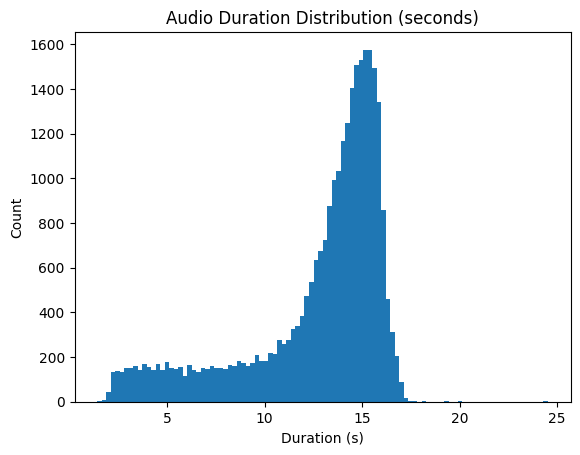

In [23]:
print("Duration (s):")
print(df["duration_s"].describe())

plt.hist(df["duration_s"], bins=100)
plt.title("Audio Duration Distribution (seconds)")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()

In [24]:
print("Sampling Rates:")
print(df["sampling_rate"].value_counts())

Sampling Rates:
sampling_rate
16000    28539
Name: count, dtype: int64


Transcript Length (characters):
count    28539.000000
mean       184.653211
std         58.646680
min          8.000000
25%        157.000000
50%        195.000000
75%        225.000000
max        398.000000
Name: text_len, dtype: float64


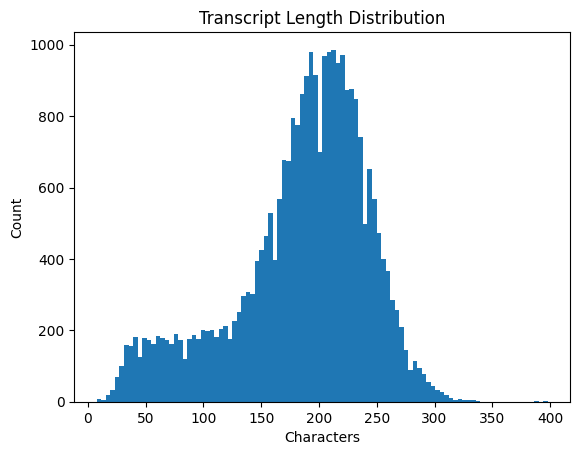

In [26]:
print("Transcript Length (characters):")
print(df["text_len"].describe())

plt.hist(df["text_len"], bins=100)
plt.title("Transcript Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()